In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as image
from PIL import Image
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

import math

In [2]:
from env import (RoboMap, Object, Robot)

In [3]:
# im = Image.open('media/robo.png')
# plt.imshow(im)

In [8]:
len_lidar_arr = np.random.randint(0,300)
# scan_ranges = np.random.

Assume that the Map ranges from 0m to 2m distance. In a continuous space.

In [9]:
plt.figure(figsize=(10,10))
#plt.plot()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

[]

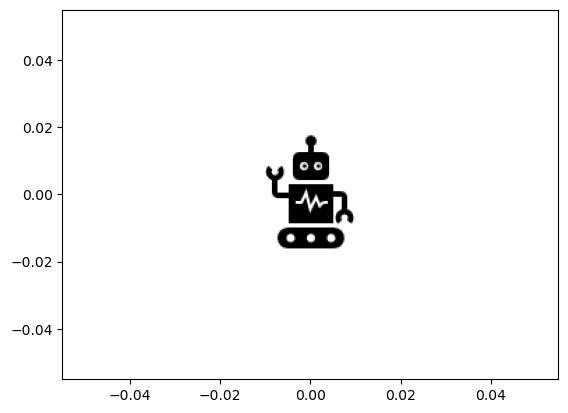

In [10]:
fig, ax = plt.subplots()

# Add robot to axis
robo_file = 'media/robo.png'
robo = image.imread(robo_file)
#The OffsetBox is a simple container artist.
#The child artists are meant to be drawn at a relative position to its #parent.
imagebox = OffsetImage(robo, zoom = 1)
#Annotation box for solar pv logo
#Container for the imagebox referring to a specific position *xy*.
ab = AnnotationBbox(imagebox, (0, 0), frameon = False)
ax.add_artist(ab)

ax.plot()

In [253]:
theta = math.radians(90)

rot_mat = np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])
v = np.array([1,1])

rot_mat @ v

array([ 1., -1.])

In [270]:
fn = lambda x: np.array([-x[1], x[0]])
fn(np.array([0,-1])).dot(np.array([0,1]))

0

In [271]:
def perp(a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

In [272]:
A = np.array([[0,0],[2,0]])
B = np.array([[1,-1],[1,1]])

a1, a2 = A
b1, b2 = B

origin_a = {'x': a1[0], 'y': a1[1]} #a1
dir_a = {'x': (a2 - a1)[0], 'y': (a2 - a1)[1]} #a2 - a1
origin_b = {'x': b1[0], 'y': b1[1]} #b1
dir_b = {'x': (b2 - a1)[0], 'y': (b2 - a1)[1]} #b2 - a1

# intersection point p
p = {'x': np.zeros(2), 'y': np.zeros(2)}
#p.x = 

#origin_b + dir_b * s = origin_a + dir_a * t


In [273]:
# def do_rays_intersect(a1, a2, b1, b2):
#     u = (a1[1] * b2[0] + b2[1] * a2[0] - a2[1] * b2[0] - b2[1] * a1[0]) / (b1[0] * b2[1] - b1[1] * b2[0])
#     (a1[0] + b1[0] * u - a2[0]) / 

In [274]:
def get_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = np.dot( dap, db)
    num = np.dot( dap, dp )
    intersec = (num / denom)*db + b1
    
A = np.array([[0,0],[2,0]])
B = np.array([[1,-1],[1,1]])

a1, a2 = A
b1, b2 = B


da = a2-a1
db = b2-b1
dp = a1-b1

c = np.empty_like(da)
c[0] = -da[1]
c[1] = da[0]

dap = c

denom = np.dot(dap, db)

num = np.dot(dap, dp)

intersec = (num/denom)*db + b1
intersec

#perp(da)



array([1., 0.])

In [306]:
class Robot():
    def __init__(self, origin, vel, rot = np.pi, laser_range = 5, total_lidar_scans = 10, lidar_scan_std = 5):
        self.X, self.Y = origin
        self.vel = vel # velocity in m/s
        self.rot = rot
        self.angle = rot
        self.laser_range = laser_range
        
        self.ranges = np.zeros([total_lidar_scans + np.random.randint(lidar_scan_std),2,2])
        self._calc_lidar_ranges()
        
        
    def move(self, time):
        """ time in seconds """
        for t in range(time):
            self.X += round(self.get_ank(self.angle, self.vel), 2)
            self.Y += round(self.get_gek(self.angle, self.vel), 2)
        return self.X, self.Y
    
    def rotate(self, angle):
        """ time in seconds """
        self.angle += angle
        
    def get_ank(self, angle, hyp):
        return np.cos(angle) * hyp

    def get_gek(self, angle, hyp):
        return np.sin(angle) * hyp
    
    def _rotate_vector(self, theta, v):
        rot_matr = np.array([[np.cos(theta), np.sin(theta)],[-np.sin(theta), np.cos(theta)]])
        return rot_matr @ v
    
    def _calc_lidar_ranges(self):
        #ranges = np.zeros([,2])
        for i in range(self.ranges.shape[0]):
            ang = i * ( (2 * np.pi) / len(self.ranges) )
            startp = np.array([self.X, self.Y])
            endp = startp + self._rotate_vector(ang, self.laser_range * np.array([1, 0]))
            vec = np.array([startp, endp])
            
            self.ranges[i] = vec
            
        #self.ranges = np.array([i * ( (2 * np.pi) / len(self.ranges) ) for i in range(len(self.ranges))])
        
    def get_lidar_ranges(self): #, robomap):
        return self.ranges
    
        #self.ranges = []
        #for i in range(365):
        #    1/i * (np.pi * 2) 

In [9]:
class RoboMap():
    """Class for whole map, which contains multiple Objects
        width: in m
        height: in m"""
    def __init__(self, width, height, plot_scale=0.5):
        self.width = width
        self.height = height
        self.objects = []
        self.plot_scale = plot_scale
        
    def get_width(self):
        return self.width
    
    def get_height(self):
        return self.height
    
    def add_object(self, obj):
        self.objects.append(obj)
        
    def get_objects(self):
        return self.objects
    
    def add_robo(self, robo):
        self.robo = robo
    
    # source: https://web.archive.org/web/20111108065352/https://www.cs.mun.ca/~rod/2500/notes/numpy-arrays/numpy-arrays.html
    #
    # line segment intersection using vectors
    # see Computer Graphics by F.S. Hill
    #
    def perp(self, a ) :
        b = np.empty_like(a)
        b[0] = -a[1]
        b[1] = a[0]
        return b

    # line segment a given by endpoints a1, a2
    # line segment b given by endpoints b1, b2
    # return 
    def get_intersect(self, a1,a2, b1,b2) :
        da = a2-a1
        db = b2-b1
        dp = a1-b1
        dap = self.perp(da)
        denom = np.dot( dap, db)
        num = np.dot( dap, dp )
        if denom == 0:
            return None
        intersec = (num / denom)*db + b1

        delta = 1e-3

        # check if calculated intersection is actually between the lines
        condx_a = min(a1[0], a2[0])-delta <= intersec[0] and max(a1[0], a2[0])+delta >= intersec[0] #within line segment a1_x-a2_x
        condx_b = min(b1[0], b2[0])-delta <= intersec[0] and max(b1[0], b2[0])+delta >= intersec[0] #within line segment b1_x-b2_x
        condy_a = min(a1[1], a2[1])-delta <= intersec[1] and max(a1[1], a2[1])+delta >= intersec[1] #within line segment a1_y-b1_y
        condy_b = min(b1[1], b2[1])-delta <= intersec[1] and max(b1[1], b2[1])+delta >= intersec[1] #within line segment a2_y-b2_y
        if not (condx_a and condy_a and condx_b and condy_b):
            intersec = None #line segments do not intercept i.e. interception is away from from the line segments

        return intersec
    
    def _draw_scatter(self, ax, data):
        if len(data.shape) == 1:
            ax.scatter([data[0]], [data[1]])
        else:
            ax.scatter(data[0,:], data[1,:])
    
    def _draw_line(self, ax, startp, endp, c='black', ls='-'):
        ax.plot([startp[0], endp[0]], [startp[1], endp[1]], c=c, ls=ls)
        
    
    def draw_map(self, show_lidar=False):
        # function to plot the map using matplotlib
        
        # Create figure and axes
        fig, ax = plt.subplots(figsize = (self.width * self.plot_scale + 2, self.height * self.plot_scale + 2))

        # Add outlines of map as rectangle
        rect = patches.Rectangle((0, 0), self.width, self.height, linewidth=1, edgecolor='b', facecolor='none')
        ax.add_patch(rect)
        
        # Add objects to map
        all_segments = []
        for obj in self.objects:
            all_segments.append(obj.get_points())
            rect = patches.Rectangle((obj.pos[0], obj.pos[1]), obj.shape[0], obj.shape[1], linewidth=1, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            
        all_segments = np.array(all_segments)
        all_segments = all_segments.reshape(all_segments.shape[0] * all_segments.shape[1], all_segments.shape[2], all_segments.shape[3])
            
        # Add robot to axis
        robo_file = 'media/robo.png'
        robo = image.imread(robo_file)
        #The OffsetBox is a simple container artist.
        #The child artists are meant to be drawn at a relative position to its #parent.
        imagebox = OffsetImage(robo, zoom = 0.5)
        #Annotation box for solar pv logo
        #Container for the imagebox referring to a specific position *xy*.
        ab = AnnotationBbox(imagebox, (self.robo.X, self.robo.Y), frameon = False)
        ax.add_artist(ab)
        
        # show lidar scans
        if show_lidar:
            total_scans = self.robo.ranges.shape[0]
            
            
            for laser in self.robo.get_lidar_ranges():
            #for i in range(total_scans + 1):
                
                #xy_ij_max = xy_robot + np.array([max_dist*np.cos(theta), max_dist*np.sin(theta)]) # max possible distance
                
#                 startx = self.robo.X
#                 starty = self.robo.Y
#                 startpos = np.array([startx, starty])
                
#                 endx = self.robo.X + (self.width - self.robo.X) * np.sin(i * (2 * np.pi) / total_scans)
#                 endy = self.robo.Y + (self.height - self.robo.Y) * np.cos(i * (2 * np.pi) / total_scans)
#                 endpos = np.array([endx, endy])

#                 startpos = np.array([self.robo.X, self.robo.Y])
                
                #angle = i * (2 * np.pi) / total_scans
                #print(math.degrees(angle))
            
                # Rotation of vectors: https://matthew-brett.github.io/teaching/rotation_2d.html
                
                
#                 endx = np.cos(angle) * self.width - np.sin(angle) * self.height
#                 endy = np.sin(angle) * self.width + np.cos(angle) * self.height
#                 endpos = np.array([endx, endy])
#                 print(f'{i}: {endpos}')
                
                # calculated earlier
                #all_segments = np.array([obj.get_points() for obj in self.objects])
                #all_segments.flatten()
                
                #for seg in all_segments:
                #print(np.array( [ self.get_intersect(startpos, endpos, seg[0], seg[1]) for seg in all_segments ], dtype=object))
                
                startpos, endpos = laser
                
                all_intersecs = []
                
                ray_intersec = None
                min_d = np.linalg.norm(endpos - startpos)
                
                for seg in all_segments:
                    
                    intersec = self.get_intersect(startpos, endpos, seg[0], seg[1])
                    if intersec is not None:
                        # get L2 length of vector
                        d = np.linalg.norm(intersec - startpos)
                        if d < min_d:
                            min_d = d
                            ray_intersec = intersec
                            
                if ray_intersec is not None:
                    #print(f'ray_intersec {ray_intersec}')
                    #print(f'ray_intersec.shape {ray_intersec.shape}')
                    self._draw_scatter(ax, ray_intersec)
                    #ax.scatter([ray_intersec[0]/2], [ray_intersec[1]/2])        
                    
                #intersec = [self.get_intersect(startpos, endpos, seg[0], seg[1]) for seg in all_segments]
                
                self._draw_line(ax, startpos, endpos, ls='--')
                #ax.plot([startx/2, endx/2], [starty/2, endy/2], c='black', ls='--')
        
        # set axis dimensions
        ax.set_xlim([0 - 1/self.plot_scale, (self.width + 1/self.plot_scale) * self.plot_scale + 1 + 1])
        ax.set_xticks(np.arange(0 - 1/self.plot_scale, self.width + 2/self.plot_scale, 1 / self.plot_scale))
        ax.set_ylim([0 - 1/self.plot_scale, (self.height + 1/self.plot_scale) * self.plot_scale + 1])
        ax.set_yticks(np.arange(0 - 1/self.plot_scale, self.height + 2/self.plot_scale, 1 / self.plot_scale))
        
        fig.savefig('robo_sim.png')
        
        return ax
    

class Object():
    """Object class for Objects in a 2D space"""
    def __init__(self, pos=(0,0), shape=(0,0), random=True): #X=0, Y=0, width=0, height=0
        if random:
            pos, shape = self.generate_randomly() #X, Y, width, height
        self.pos = np.array(pos)
        self.shape = np.array(shape)
        
        #self.X = X
        #self.Y = Y
        #self.width = width
        #self.height = height
    
    
    def generate_randomly(self, map_wid = 20, map_hei = 20, min_wid = 1, min_hei = 1):
        X = int(np.random.rand() * (map_wid - min_wid))
        Y = int(np.random.rand() * (map_hei - min_hei))
        width = np.random.randint(min_wid, map_wid - X ) #* 0.01 # scale width in cm
        height = np.random.randint(min_hei, map_hei - Y) #* 0.01 # scale height in cm
        return (X, Y), (width, height)
    
    def get_points(self):
        """
        returns segments for each side of object
        bottom, left, up, right
        """
        
        wid_shift = np.zeros(self.pos.shape[0])
        wid_shift[0] = self.shape[0]
        heig_shift = np.zeros(self.pos.shape[0])
        heig_shift[1] = self.shape[1]
        
        seg_bottom = [self.pos, self.pos + wid_shift]
        seg_left = [self.pos, self.pos + heig_shift]
        seg_right = [self.pos + wid_shift, self.pos + wid_shift + heig_shift]
        seg_top = [self.pos + heig_shift, self.pos + wid_shift + heig_shift]
        
        
        return [seg_bottom, seg_left, seg_right, seg_top]
    

        
        

In [10]:
arr = np.array([1,2], dtype=np.float64)
arr[0].reshape(1)

array([1.])

In [3]:
rbMap = RoboMap(20, 20)
rbMap.add_object(Object())
rbMap.add_object(Object())
rbMap.add_robo(Robot(origin=(10,10), vel=0.05))

In [4]:
#from env import (RoboMap, Object)

[]

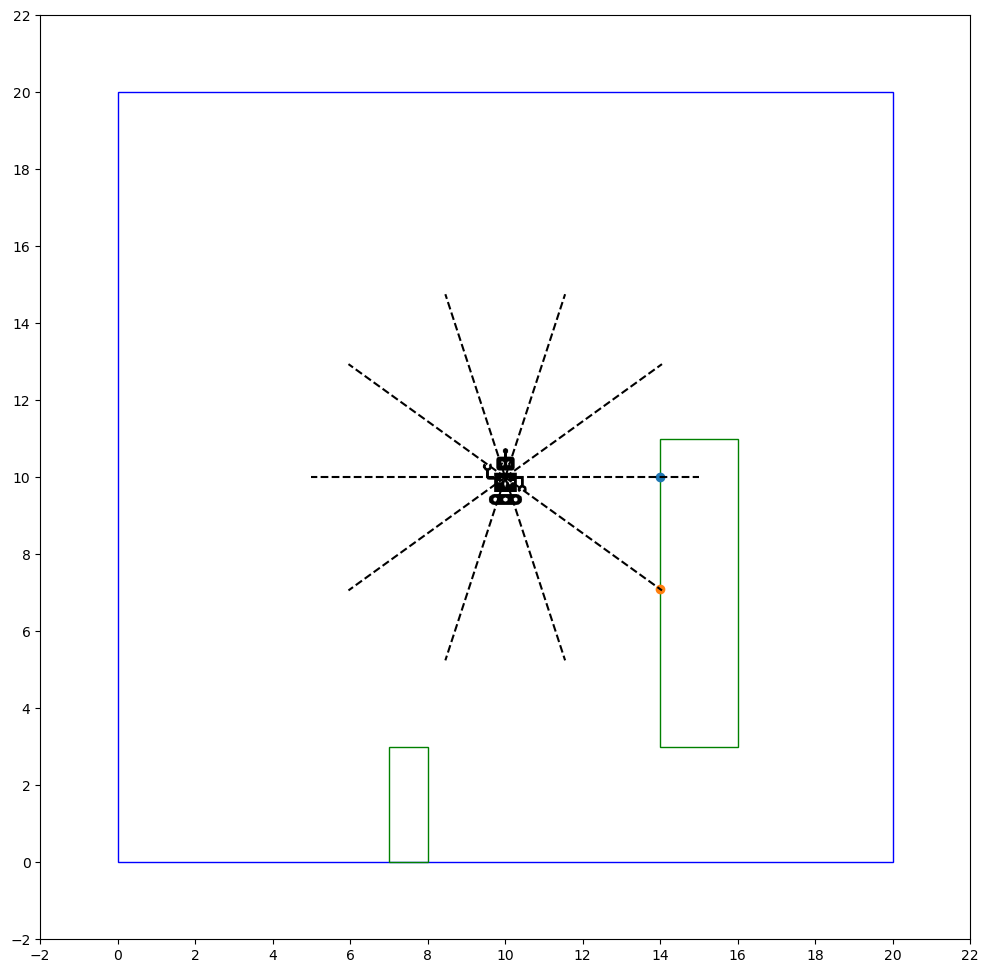

In [11]:
#print(rbMap.get_objects()[0].get_points())


rbMap.draw_map(show_lidar = True).plot()


## Pygame version

In [104]:
import matplotlib.pyplot as plt

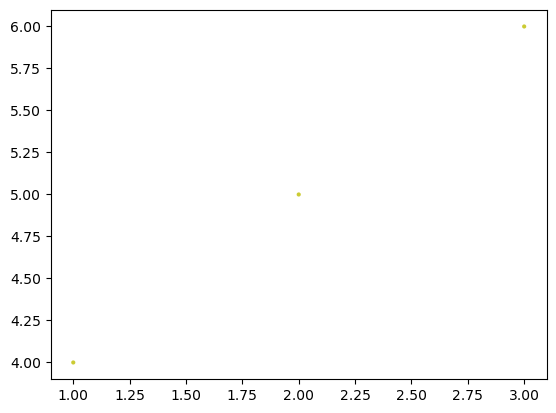

In [114]:
fig = plt.figure()

ax = fig.add_subplot(111)

#ax.scatter(connected_components[:, 0], connected_components[:, 1], marker='.', c='y', edgecolor='', alpha=0.2)
ax.scatter([1,2,3],[4,5,6], marker='.', c='y', edgecolor='none', alpha=0.8)

------

In [64]:
class Filter():
    def __init__(self):
        pass
        
# Particle Filter / Sequential Importance Resampling
class SIR(Filter):
    def __init__(self):
        super().__init__()
        
    def filter(self, X):
        M = len(X)
        X_t = np.zeros(M)
        X_t_bar = np.zeros(M)
        
        for m in range(M):
            np.random.
        #X.count()
        

## 2D Point Cloud

### 2D line segment intersection

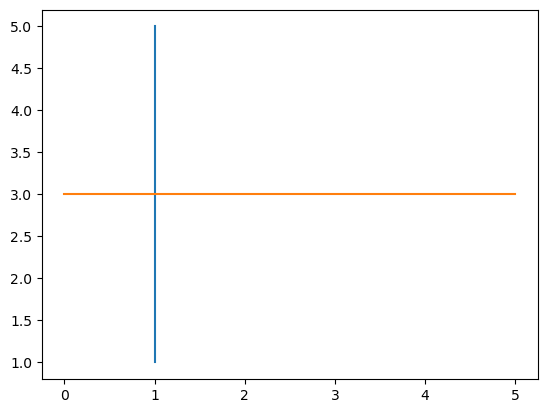

In [124]:
A = np.array([[1,1],[1,5]], dtype=np.float32)
B = np.array([[0,3],[5,3]], dtype=np.float32)

plt.plot(A[:,0], A[:,1])
plt.plot(B[:,0], B[:,1])

In [128]:
# source: https://web.archive.org/web/20111108065352/https://www.cs.mun.ca/~rod/2500/notes/numpy-arrays/numpy-arrays.html
#
# line segment intersection using vectors
# see Computer Graphics by F.S. Hill
#
def perp( a ) :
    b = np.empty_like(a)
    b[0] = -a[1]
    b[1] = a[0]
    return b

# line segment a given by endpoints a1, a2
# line segment b given by endpoints b1, b2
# return 
def get_intersect(a1,a2, b1,b2) :
    da = a2-a1
    db = b2-b1
    dp = a1-b1
    dap = perp(da)
    denom = np.dot( dap, db)
    num = np.dot( dap, dp )
    intersec = (num / denom)*db + b1

    delta = 1e-3
    
    # check if calculated intersection is actually between the lines
    condx_a = min(a1[0], a2[0])-delta <= intersec[0] and max(a1[0], a2[0])+delta >= intersec[0] #within line segment a1_x-a2_x
    condx_b = min(b1[0], b2[0])-delta <= intersec[0] and max(b1[0], b2[0])+delta >= intersec[0] #within line segment b1_x-b2_x
    condy_a = min(a1[1], a2[1])-delta <= intersec[1] and max(a1[1], a2[1])+delta >= intersec[1] #within line segment a1_y-b1_y
    condy_b = min(b1[1], b2[1])-delta <= intersec[1] and max(b1[1], b2[1])+delta >= intersec[1] #within line segment a2_y-b2_y
    if not (condx_a and condy_a and condx_b and condy_b):
        intersec = None #line segments do not intercept i.e. interception is away from from the line segments

    return intersec

get_intersect(A[0], A[1], B[0], B[1])
# p1 = np.array( [0.0, 0.0] )
# p2 = np.array( [1.0, 0.0] )

# p3 = np.array( [4.0, -5.0] )
# p4 = np.array( [4.0, 2.0] )

# print seg_intersect( p1,p2, p3,p4)

# p1 = np.array( [2.0, 2.0] )
# p2 = np.array( [4.0, 3.0] )

# p3 = np.array( [6.0, 0.0] )
# p4 = np.array( [6.0, 3.0] )


# print(seg_intersect( p1,p2, p3,p4))

array([1., 3.], dtype=float32)

In [ ]:
rbMap = RoboMap(20, 20)
rbMap.add_object(Object())
rbMap.add_robo(Robot(origin=(5,5), vel=0.05))
rbMap.draw_map(show_lidar = True).plot()

In [24]:
len_ranges = 222
scan_ranges = np.round( (np.random.rand(len_ranges) * 2 - 1), decimals=2)
scan_ranges

array([-0.1 , -0.66, -0.57,  0.27,  0.52, -0.19, -0.67,  0.84,  0.15,
        0.69, -0.27,  0.75, -0.33,  0.91, -0.3 , -0.19,  0.41,  0.05,
       -0.46,  0.81, -0.64,  0.1 ,  0.96,  0.15, -0.82, -0.08, -0.58,
       -0.49, -0.89,  0.92, -0.4 , -0.65, -0.27, -0.57, -0.99, -0.64,
        0.05,  0.11,  0.2 ,  0.24,  0.92, -0.88, -0.92,  0.72, -0.6 ,
        0.77,  0.35, -0.04, -0.65, -0.4 ,  0.33, -0.17, -0.07,  0.19,
        0.7 , -0.47,  0.39,  0.75,  0.03, -0.35, -0.01,  0.82,  0.26,
       -0.15,  0.33, -0.45,  0.47, -0.18,  0.84,  0.63, -0.88, -0.93,
       -0.62,  0.65,  0.44, -0.37, -0.93,  0.15,  0.88,  0.25,  0.28,
       -0.22, -0.87,  0.27, -0.66,  0.11,  0.82,  0.38,  0.07,  0.24,
        0.75,  0.38, -0.31,  1.  , -0.26,  0.79, -0.47,  0.99,  0.33,
       -0.3 ,  0.85,  0.95,  0.29,  0.25,  0.49, -0.37,  0.84,  0.27,
       -0.27, -0.13,  0.84, -0.54, -0.13, -0.32,  0.22,  0.61, -0.42,
       -0.95, -0.18, -0.32, -0.39,  0.24,  0.31,  0.1 , -0.58,  0.54,
        0.39,  0.09,

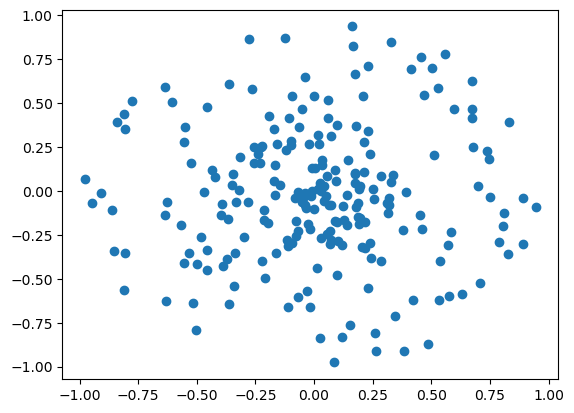

In [26]:
def get_coordinates(ranges):
    
    origin = (0,0)
    
    # angle per point
    ang = (2 * np.pi) / len(ranges) 
    
    coords = np.zeros((len(ranges), 3))
    
    for idx, l in enumerate(ranges):
        theta = idx * ang
        x = np.sin(theta) * l
        y = np.cos(theta) * l
        
        
        coords[idx] = [x, y, theta]
        
    return coords

coords = get_coordinates(scan_ranges)
plt.scatter(coords[:,0], coords[:,1])
    
    

In [ ]:
plt.scatter()

------

In [65]:
SIR_f = SIR()

In [66]:
samples = np.random.normal(loc=0, scale=5, size=1000)
SIR_f.filter(np.random.normal(loc=0, scale=5, size=1000))

In [69]:
len(samples)

1000

In [48]:
rb_map = RoboMap(2,2)
rb_map.add_object(Object())
rb_map.add_object(Object())

robo = Robot((0.5,0.5), 0.2)
print(robo.move(2))
robo.rotate(np.pi*1/2)
print(robo.move(1))


(0.09999999999999998, 0.5)
(0.09999999999999998, 0.3)


In [48]:
import numpy as np
#from mujoco_py import functions
from ctypes import c_int, addressof
from math import sqrt


In [49]:
from xml.dom import minidom
from mujoco_py.utils import remove_empty_lines
from mujoco_py.builder import build_callback_fn
from threading import Lock

ModuleNotFoundError: No module named 'mujoco_py'

In [ ]:
def ray(self, pnt, vec, include_static_geoms=True, exclude_body=-1, group_filter=None):
    """
    Cast a ray into the scene, and return the first valid geom it intersects.
        pnt - origin point of the ray in world coordinates (X Y Z)
        vec - direction of the ray in world coordinates (X Y Z)
        include_static_geoms - if False, we exclude geoms that are children of worldbody.
        exclude_body - if this is a body ID, we exclude all children geoms of this body.
        group_filter - a vector of booleans of length const.NGROUP
                       which specifies what geom groups (stored in model.geom_group)
                       to enable or disable.  If none, all groups are used
    Returns (distance, geomid) where
        distance - distance along ray until first collision with geom
        geomid - id of the geom the ray collided with
    If no collision was found in the scene, return (-1, None)
    NOTE: sometimes self.forward() needs to be called before self.ray().
    See self.ray_fast_group() and self.ray_fast_nogroup() for versions of this call
    with more stringent type requirements.
    """
    cdef mjtNum distance
    cdef mjtNum[::view.contiguous] pnt_view = pnt
    cdef mjtNum[::view.contiguous] vec_view = vec

    if group_filter is None:
        return self.ray_fast_nogroup(
            np.asarray(pnt, dtype=np.float64),
            np.asarray(vec, dtype=np.float64),
            1 if include_static_geoms else 0,
            exclude_body)
    else:
        return self.ray_fast_group(
            np.asarray(pnt, dtype=np.float64),
            np.asarray(vec, dtype=np.float64),
            np.asarray(group_filter, dtype=np.uint8),
            1 if include_static_geoms else 0,
            exclude_body)

def ray_fast_group(self,
        np.ndarray[np.float64_t, mode="c", ndim=1] pnt,
        np.ndarray[np.float64_t, mode="c", ndim=1] vec,
        np.ndarray[np.uint8_t, mode="c", ndim=1] geomgroup,
        mjtByte flg_static=1,
        int bodyexclude=-1):
    """
    Faster version of sim.ray(), which avoids extra copies,
    but needs to be given all the correct type arrays.
    See self.ray() for explanation of arguments
    """
    cdef int geomid
    cdef mjtNum distance
    cdef mjtNum[::view.contiguous] pnt_view = pnt
    cdef mjtNum[::view.contiguous] vec_view = vec
    cdef mjtByte[::view.contiguous] geomgroup_view = geomgroup

    distance = mj_ray(self.model.ptr,
                      self.data.ptr,
                      &pnt_view[0],
                      &vec_view[0],
                      &geomgroup_view[0],
                      flg_static,
                      bodyexclude,
                      &geomid)
    return (distance, geomid)

In [ ]:


def raycast(sim, geom1_id=None, geom2_id=None, pt1=None, pt2=None, geom_group=None):
    '''
        Given a mujoco sim, from a geom to a geom, point to a point
        Args:
            sim: Mujoco sim object
            geom1 (int), id of geom ray originates from
            geom2 (int), id of geom ray points to
            p1 (np.ndarray[3]): 3D point ray originates from
            p2 (np.ndarray[3]): 3D point ray points to
            geom_group: one-hot list determining which of the five geom groups
                        should be visible to the raycast
    '''
    assert (geom1_id is None) != (pt1 is None), "geom1_id or p1 must be specified"
    assert (geom2_id is None) != (pt2 is None), "geom2_id or p2 must be specified"
    if geom1_id is not None:
        pt1 = sim.data.geom_xpos[geom1_id]
        body1 = sim.model.geom_bodyid[geom1_id]
    else:
        # Don't exclude any bodies if we originate ray from a point
        body1 = np.max(sim.model.geom_bodyid) + 1
    if geom2_id is not None:
        pt2 = sim.data.geom_xpos[geom2_id]

    ray_direction = pt2 - pt1
    ray_direction /= sqrt(ray_direction[0] ** 2 + ray_direction[1] ** 2 + ray_direction[2] ** 2)

    if geom_group is not None:
        geom_group = np.array(geom_group).astype(np.uint8)
    else:
        geom_group = np.array([1, 1, 1, 1, 1]).astype(np.uint8)  # This is the default geom group

    # Setup int array
    c_arr = (c_int*1)(0)
    dist = functions.mj_ray(sim.model,
                            sim.data,
                            pt1,
                            ray_direction,
                            geom_group,
                            np.array([[0]]).astype(np.uint8),  # flg_static. TODO idk what this is
                            body1,  # Bodyid to exclude
                            addressof(c_arr))
    collision_geom = c_arr[0] if c_arr[0] != -1 else None
    return dist, collision_geom

In [5]:
import numpy as np
np.e

2.718281828459045

## Le Particle Filteroni 

In [13]:
def model(x, t, nu=np.random.gamma, nu_shape=3, nu_scale=2, phi=0.5, omega=4*np.e-2):
    """
    x: obligatory - input data from t-1
    t: obligatory - current time step
    nu: gamma distribution
    nu: gamma distribution shape
    nu: gamma distribution scale
    phi: scalar initialized as 0.5 as given in paper
    omega: scalar initialized as 0.5 as given in paper
    """
    y = 0x
    n = np.random.normal
    x_new = 1 + np.sin(omega * np.pi * t) + nu(nu_shape, nu_scale)
    if t <= 30:
        y = phi * x**2 + n(0,1) #nu(nu_shape, nu_scale)
    else:
        y = phi * x - 2 + n(0,1) #nu(nu_shape, nu_scale)
        
    return x_new, y
    
    

In [14]:
model(1,0)

(8.06111300515747, 0.25318642914891876)

In [ ]:
def SIR(prior, N):
    
    for i in range(N)